In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='latin_1')

In [3]:
# Have to make the data into a data frame so we can select and group them

df = pd.DataFrame(df)

df

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [4]:
# Lower casing all the journal titles so that the same journal titles aren't confused
# as different because of different casing

df['Journal title'] = df['Journal title'].str.lower()

### Determine the five most common journals and the total articles for each.

In [5]:
df_top5 = df['Journal title'].value_counts()
df_top5 = df_top5.head(5)
df_top5

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos pathogens                      24
plos genetics                       24
Name: Journal title, dtype: int64

### Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal . 

In [6]:
# Filter all £ in the Cost column by using the contain() method to only return
# all values with £ in it, since some have $ in it.

df = df[df['COST (£) charged to Wellcome (inc VAT when charged)'].str.contains('£')]

# Replace all £ in the Cost column with Nothing by using the replace() method so 
# that it's only the number

df['COST (£) charged to Wellcome (inc VAT when charged)'] = df['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£', '')

# The values in Cost have to be converted from Object type to numeric type so we can
# apply summary statistics

df['COST (£) charged to Wellcome (inc VAT when charged)'] = pd.to_numeric(df['COST (£) charged to Wellcome (inc VAT when charged)'])

# Delete all rows with extreme values such as greater than 25000.00 since it's an extreme value

df = df[df['COST (£) charged to Wellcome (inc VAT when charged)'] < 25000.00]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df[(['Journal title','COST (£) charged to Wellcome (inc VAT when charged)'])].groupby('Journal title').describe()

COST (£) charged to Wellcome (inc VAT when charged)  \
                                                                                                 count   
Journal title                                                                                            
academy of nutrition and dietetics                                                                1.0    
acs chemical biology                                                                              5.0    
acs chemical neuroscience                                                                         1.0    
acs nano                                                                                          2.0    
acta crystallographica section d,  biological c...                                                1.0    
acta crystallographica section d: biological cr...                                                1.0    
acta crystallographica section f: structural bi...                                                2.0    
acta crystallographica, section d                                                                 1.0    
acta crystallography d                                                                            1.0    
acta d                                                                                            1.0    
acta dermato venereologica                                                                        1.0    
acta diabetologica                                                                                1.0    
acta f                                                                                            1.0    
acta neuropathol                                                                                  1.0    
acta neuropathologica                                                                             3.0    
acta opthalmologica                                                                               1.0    
acta physiol                                                                                      1.0    
addiction                                                                                         2.0    
advances in experimental medicine and biology                                                     4.0    
age                                                                                               2.0    
age and ageing                                                                                    1.0    
ageing & society                                                                                  1.0    
aging cell                                                                                        1.0    
aids                                                                                              3.0    
aids behav                                                                                        1.0    
aids care                                                                                         4.0    
aids journal                                                                                      1.0    
aids research and therapy                                                                         1.0    
aids uk                                                                                           2.0    
alcohol and alcoholism                                                                            1.0    
...                                                                                               ...    
traffic                                                                                           6.0    
transactions of the royal society of tropical m...                                                1.0    
translational psychiatry                                                                          2.0    
trends in cognitive science                                                                       1.0    
trends in genetics     

### For a real bonus round, identify the open access prices paid by subject area.

(array([5.770e+02, 1.311e+03, 1.460e+02, 2.800e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.,  1320.,  2640.,  3960.,  5280.,  6600.,  7920.,  9240.,
        10560., 11880., 13200.]),
 <a list of 10 Patch objects>)

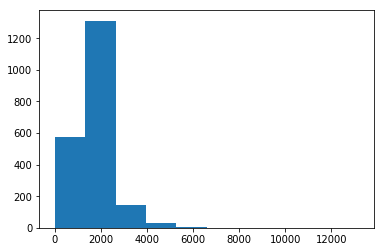

In [9]:
plt.hist(df['COST (£) charged to Wellcome (inc VAT when charged)'])